In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the matches dataset
matches_df = pd.read_csv("C:/Users/karth/Downloads/matchesS.csv")
deliveries_df = pd.read_csv("C:/Users/karth/Downloads/Team comparision/deliveries.csv")

# Display the first few rows
matches_df.head()


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,18-04-2008,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,19-04-2008,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,19-04-2008,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,20-04-2008,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,20-04-2008,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [7]:
matches_df.isnull().sum()

id                    0
season                0
city                  0
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                0
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [9]:
# Fill missing values for numerical columns with 0
matches_df['result_margin'] = matches_df['result_margin'].fillna(0)

# Drop rows where essential fields are missing
matches_df = matches_df.dropna(subset=['winner'])

# Verify missing values are handled
matches_df.isnull().sum()


id                    0
season                0
city                  0
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                0
result                0
result_margin         0
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [11]:
# Count total matches played by each team
matches_played = matches_df['team1'].value_counts() + matches_df['team2'].value_counts()

# Count total matches won by each team
matches_won = matches_df['winner'].value_counts()

# Calculate win percentage
win_percentage = (matches_won / matches_played) * 100
win_percentage = win_percentage.dropna().sort_values(ascending=False)

# Display the win percentage
win_percentage


Chennai Super Kings            58.403361
Mumbai Indians                 55.172414
Gujarat Lions                  54.666667
Lucknow Super Giants           54.545455
Kolkata Knight Riders          52.191235
Rajasthan Royals               51.131222
Rising Pune Supergiants        50.000000
Royal Challengers Bangalore    48.627451
Delhi Capitals                 46.031746
Punjab Kings                   45.528455
Sunrisers Hyderabad            45.525292
Kochi Tuskers Kerala           42.857143
Pune Warriors                  28.260870
Name: count, dtype: float64

<Figure size 1200x600 with 0 Axes>

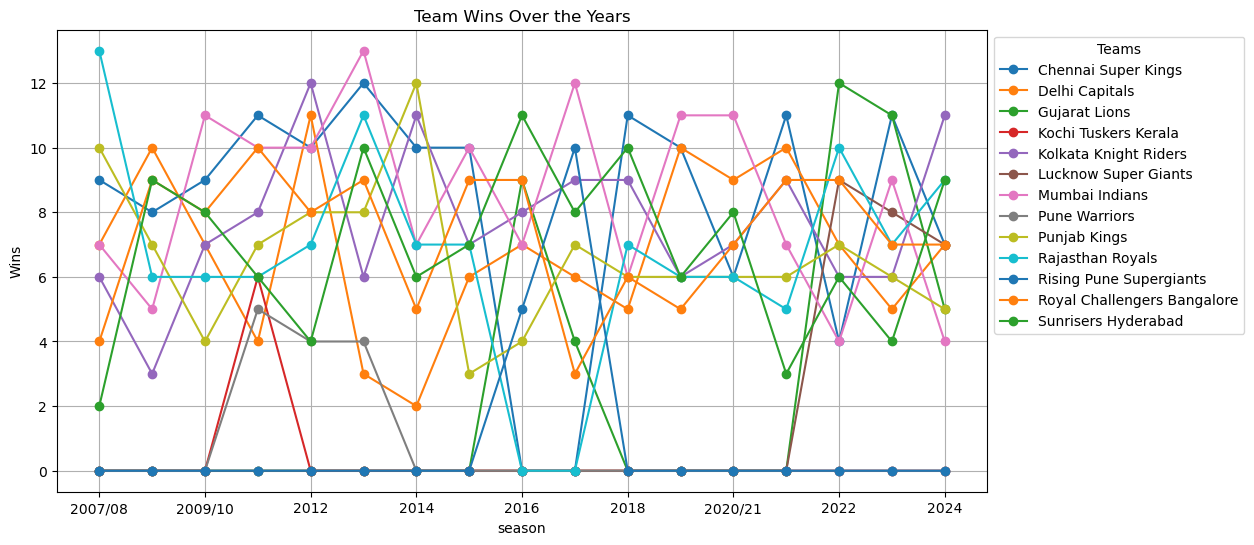

In [13]:
# Group by season and winning team to count wins per season
seasonal_wins = matches_df.groupby(['season', 'winner']).size().unstack(fill_value=0)
# Plot the line chart
plt.figure(figsize=(12, 6))
seasonal_wins.plot(kind='line', marker='o', figsize=(12, 6))
plt.title("Team Wins Over the Years")
plt.xlabel("season")
plt.ylabel("Wins")
plt.legend(title="Teams", bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()


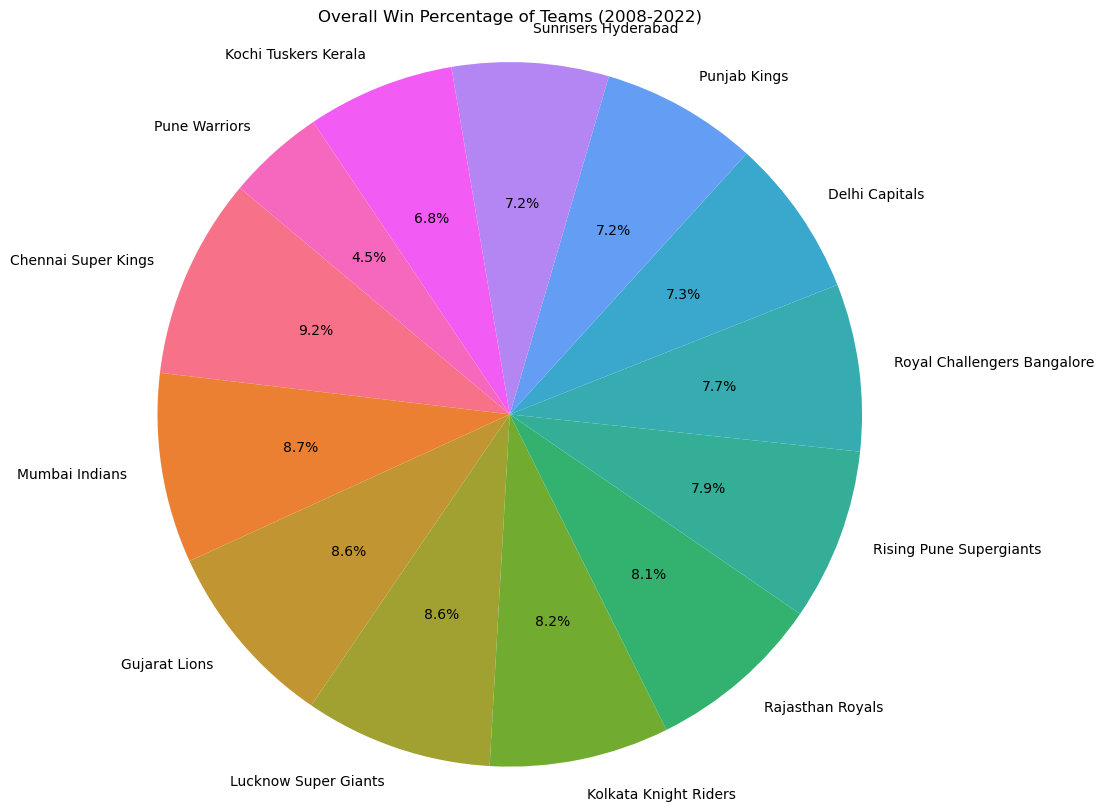

In [15]:
# Plot the pie chart
plt.figure(figsize=(10, 10))
plt.pie(win_percentage, labels=win_percentage.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("husl", len(win_percentage)))
plt.title("Overall Win Percentage of Teams (2008-2022)")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [17]:
deliveries_df = pd.read_csv("C:/Users/karth/Downloads/Team comparision/deliveries.csv")


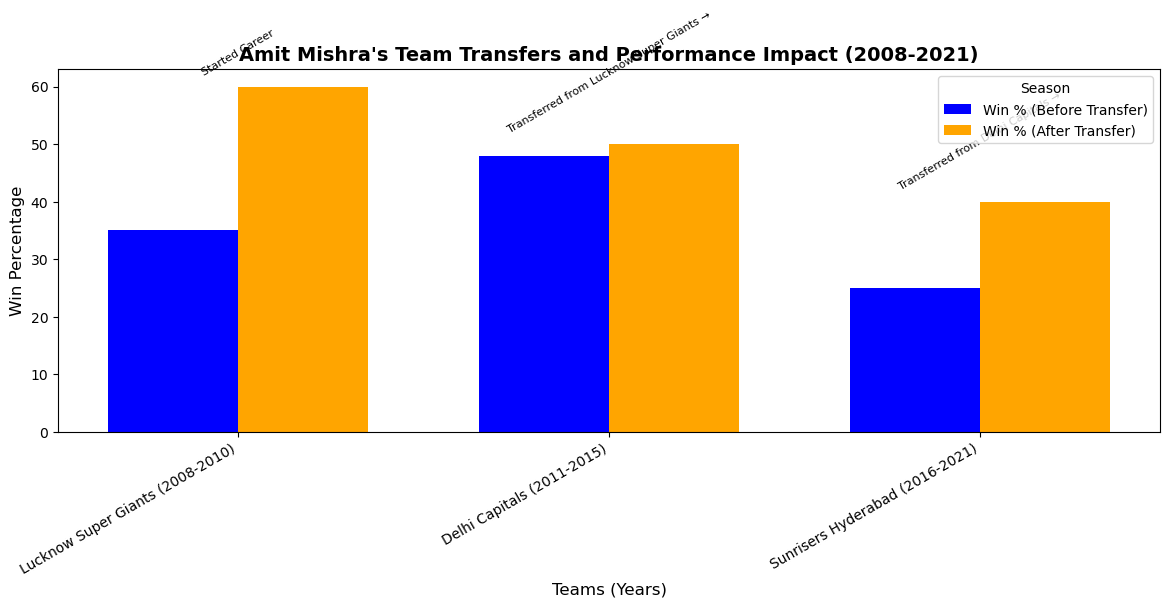

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import textwrap

# ------------------------------
# 1. Amit Mishra's Career Path Data (With Years)
# ------------------------------
data = {
    "Teams": ["Lucknow Super Giants (2008-2010)", "Delhi Capitals (2011-2015)", "Sunrisers Hyderabad (2016-2021)"],  
    "Win_Percentage_Early": [35, 48, 25],  # Win % when he joined
    "Win_Percentage_Later": [60, 50, 40]  # Win % in later years
}

df = pd.DataFrame(data)

# ------------------------------
# 2. Player Transfer Mapping (With Years)
# ------------------------------
amit_mishra_transfers = {
    "Lucknow Super Giants (2008-2010)": "Started Career",
    "Delhi Capitals (2011-2015)": "Transferred from Lucknow Super Giants →",
    "Sunrisers Hyderabad (2016-2021)": "Transferred from Delhi Capitals →"
}

# ------------------------------
# 3. Plot Configuration
# ------------------------------
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(df["Teams"]))

# Bar plot for win percentages
plt.bar(x, df["Win_Percentage_Early"], width=bar_width, label="Win % (Before Transfer)", color="blue")
plt.bar([i + bar_width for i in x], df["Win_Percentage_Later"], width=bar_width, label="Win % (After Transfer)", color="orange")

# ------------------------------
# 4. X-Axis Labels (Including Years)
# ------------------------------
plt.xticks([i + bar_width / 2 for i in x], df["Teams"], rotation=30, ha="right", fontsize=10)

# ------------------------------
# 5. Title, Labels, and Legend
# ------------------------------
plt.title("Amit Mishra's Team Transfers and Performance Impact (2008-2021)", fontsize=14, fontweight="bold")
plt.xlabel("Teams (Years)", fontsize=12)
plt.ylabel("Win Percentage", fontsize=12)
plt.legend(title="Season", fontsize=10)

# ------------------------------
# 6. Add Player Transfers as Annotations (With Arrows)
# ------------------------------
for i, team in enumerate(df["Teams"]):
    plt.text(i + bar_width / 2, max(df["Win_Percentage_Early"][i], df["Win_Percentage_Later"][i]) + 2,
             amit_mishra_transfers[team], 
             ha="center", fontsize=8, rotation=30)

# ------------------------------
# 7. Adjust Layout and Show Plot
# ------------------------------
plt.tight_layout()
plt.show()


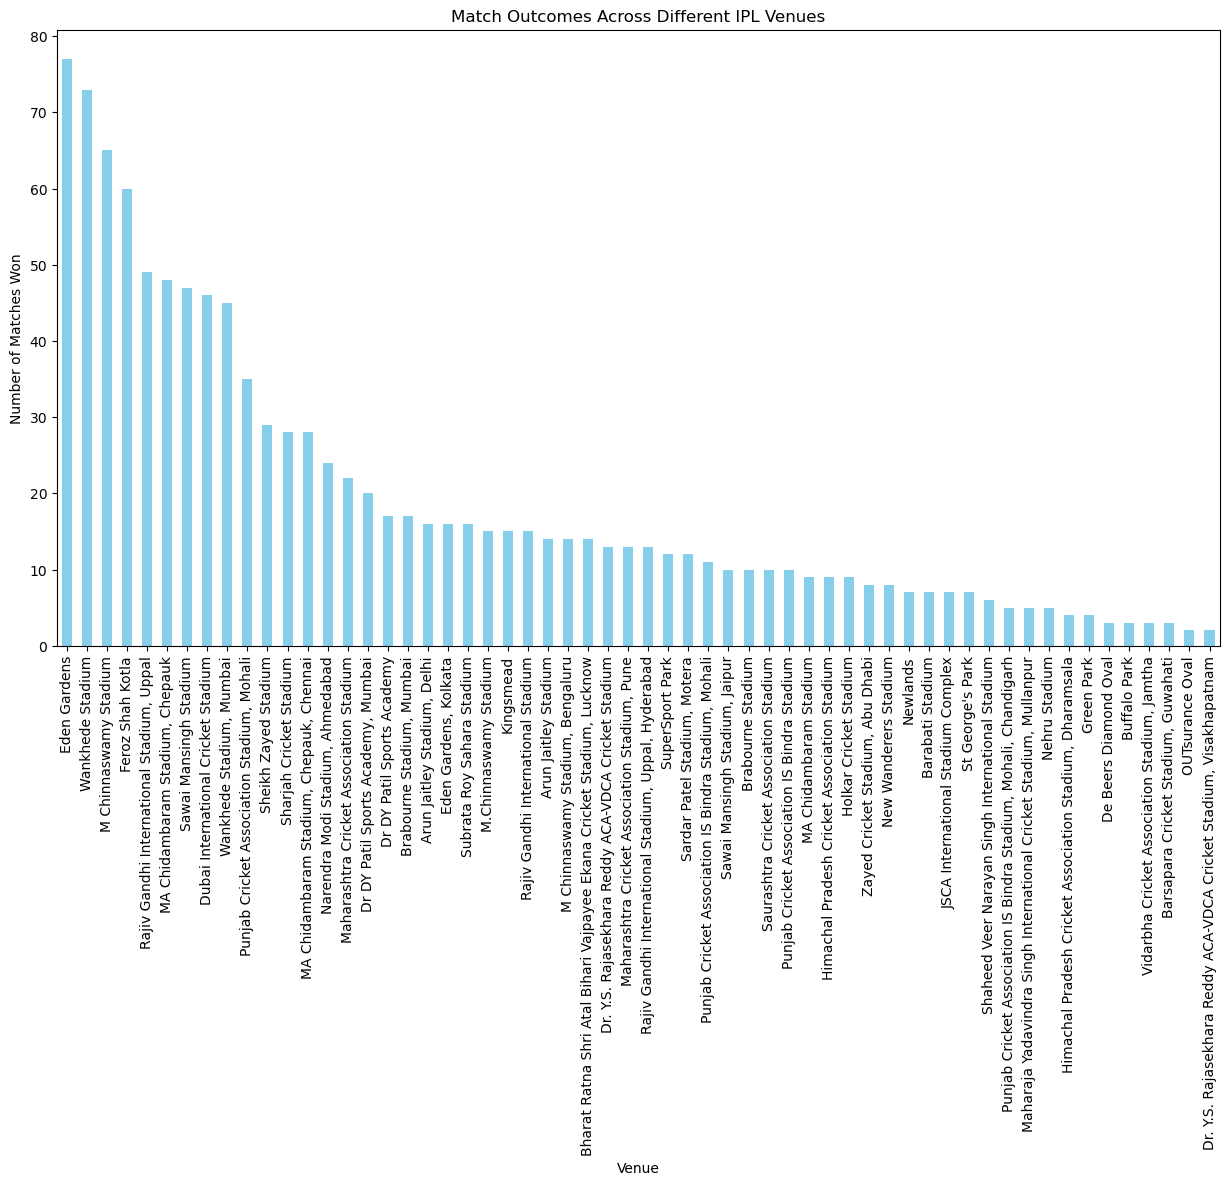

In [133]:
#4th features bar chart

# Count the number of matches won at each venue
venue_performance = matches_df.groupby("venue")["winner"].value_counts().unstack().fillna(0)

# Plot venue-based performance using a bar chart
plt.figure(figsize=(15, 8))
venue_performance.sum(axis=1).sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Match Outcomes Across Different IPL Venues")
plt.xlabel("Venue")
plt.ylabel("Number of Matches Won")
plt.xticks(rotation=90)
plt.show()


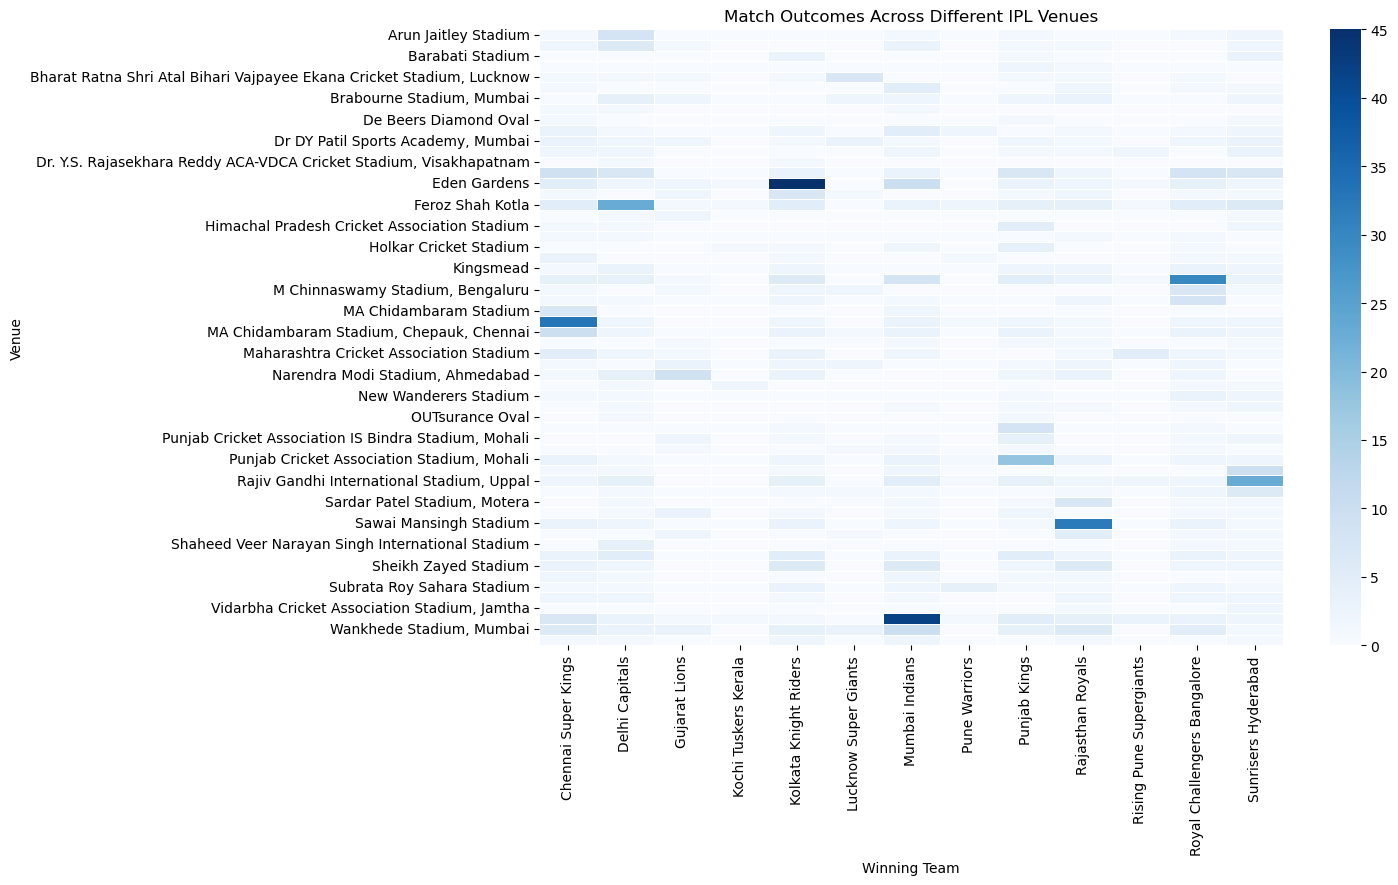

In [143]:
#4th features heat map
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of matches won at each venue
venue_performance = matches_df.groupby("venue")["winner"].value_counts().unstack().fillna(0)

# Plot venue-based performance using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(venue_performance, cmap="Blues", linewidths=0.5, annot=False)
plt.title("Match Outcomes Across Different IPL Venues")
plt.xlabel("Winning Team")
plt.ylabel("Venue")
plt.show()
